In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

In [7]:
def MSimpson(f,a,b,N):
    """Calculates the integral of a function using Simpson's rule"""
    #Step size
    h = (b-a)/N
    #Array of x values
    x = np.linspace(a,b,N+1)
    #Simpson's rule
    I = 0
    for i in range (N):
        #c coefficient
        ci = 0.5*(x[i] + x[i+1])
        I += (h/6)*(f(x[i]) + 4*f(ci) + f(x[i+1]))
    return I

def function(t):
    return (1+(t**2/2))**(-3/2)

        x   values
0    0.00  0.50000
1    0.01  0.50354
2    0.02  0.50707
3    0.03  0.51060
4    0.04  0.51414
..    ...      ...
296  2.96  0.95115
297  2.97  0.95143
298  2.98  0.95171
299  2.99  0.95199
300  3.00  0.95227

[301 rows x 2 columns]


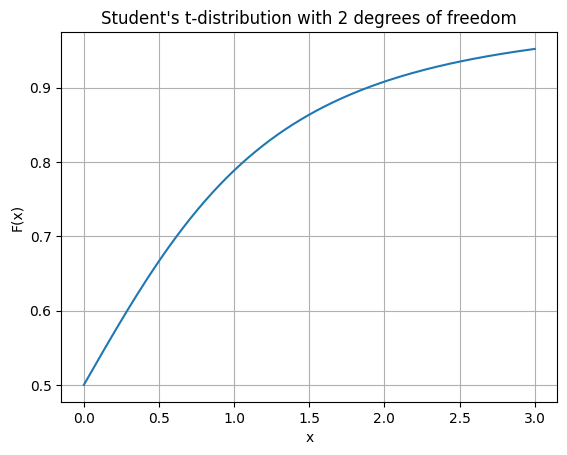

In [10]:
x = np.arange(0,3.01,0.01)
values = []
for i in range(len(x)):
    values.append(MSimpson(function, 0, x[i], 10000))

values = np.array(values)
values = 1/2 + (1/(2*np.sqrt(2))) * values
values = np.around(values, decimals=5)

data = {'x': x, 'values': values}
values_dataframe = pd.DataFrame(data)

print(values_dataframe)

plt.plot(x, values)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title("Student's t-distribution with 2 degrees of freedom")
plt.grid()
plt.show()

We want to specify numerically the limit when x tends to infinity of the integral of the function. For this we take a value of x which is large enough, in our case it will be 10 000

In [15]:
limit = 1/2 + (1/(2*np.sqrt(2))) * MSimpson(function, 0, 10000, int(10000/0.01))
print(f"The limit when x tends to infinity of the integral of the function is {limit}")

The limit when x tends to infinity of the integral of the function is 0.999999995000029


In [17]:
def dichotomy(values, target, tolerance=1e-10):
    lower = 0
    upper = len(values) - 1

    while upper - lower > 1:
        midpoint = (upper + lower) // 2
        if values[midpoint] < target:
            lower = midpoint
        else:
            upper = midpoint

    if abs(values[upper] - target) < tolerance:
        return x[upper]
    elif abs(values[lower] - target) < tolerance:
        return x[lower]
    else:
        return None

target_value = 0.95
x_value = dichotomy(values, target_value)

if x_value is not None:
    print(f"The value of x for which F(x) is equal to {target_value} is approximately {x_value}")
else:
    print(f"No value of x found for which F(x) is equal to {target_value} within the specified tolerance.")

The value of x for which F(x) is equal to 0.95 is approximately 2.92


# Question 2

In [19]:
def RK4(F,a,b,y0,N):
    h = (b-a)/N
    t_values = np.linspace(a, b, N + 1)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    for i in range(N):
        t = t_values[i]
        y = y_values[i]
        k1 = h * F(t, y)
        k2 = h * F(t + h/2, y + k1/2)
        k3 = h * F(t + h/2, y + k2/2)
        k4 = h * F(t + h, y + k3)
        y_values[i+1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t_values, y_values

Definition of the function and initial condition

In [24]:
def function(t,y):
    return np.array([y[1], 2*np.sin(y[0]) - np.sin(t)])

y0 = np.array([0, 1])
interval = (0, 10)

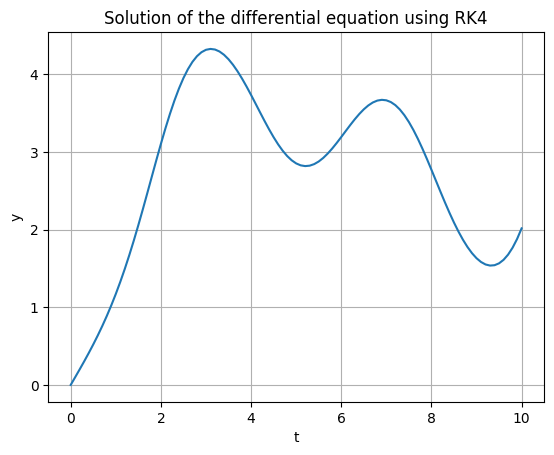

In [27]:
t_rk4, y_rk4 = RK4(function, interval[0], interval[1], y0, 100)
plt.plot(t_rk4, y_rk4[:,0], label='y')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of the differential equation using RK4')
plt.grid()
plt.show()

In [43]:
def EulerExplicit_2ndOrderEquation(f, a, b, y0, N):
    t = np.linspace(a, b, N+1)
    h = (b - a) / N
    Y = np.zeros((2, N+1))
    Y[:, 0] = y0

    for i in range(N):
        Y[:, i+1] = Y[:, i] + h * Y[1, i]                       # First derivative update
        Y[1, i+1] = Y[1, i] + h * f(t[i], Y[0, i], Y[1, i])     # Second derivative update

    return t, Y

def function_other_define(t, y, y_prime):
    return 2*np.sin(y) - np.sin(t)

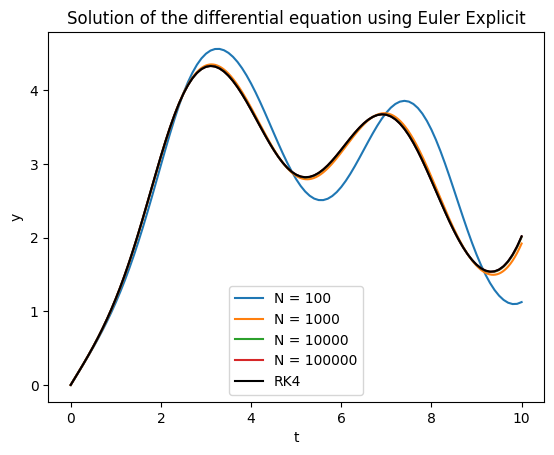

In [47]:
N = [100, 1000, 10000, 100000]
t_values = []
y_values = []

for n in N:
    t3, Y = EulerExplicit_2ndOrderEquation(function_other_define, interval[0], interval[1], y0, n)
    y_values.append(Y[0, :])
    t_values.append(t3)

for i in range(len(N)):
    plt.plot(t_values[i], y_values[i], label=f'N = {N[i]}')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Solution of the differential equation using Euler Explicit')
    plt.grid()

plt.plot(t_rk4, y_rk4[:,0], label='RK4', color='black')
plt.legend()
plt.show()

When N is little the solution is not accurate, but as N increases the solution becomes more accurate. 
The Euler Explicit method is not as accurate as the RK4 method, but it is faster.